### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
import numpy as np
from scipy.stats import linregress
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import snippets as sp
reload(sp)

#dir(sp)

<module 'snippets' from '/gpfs/home/mep22dku/scratch/SOZONE/UTILS/snippets.py'>

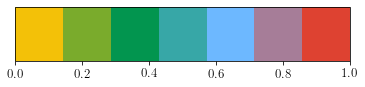

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define the endpoint colors
colors = ['#f3c108','#02954f','#6db8ff', '#de4231',]
#colors = ['y', '#6db8ff']

# Create the colormap
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors, N=7)

# Display the colormap
fig, ax = plt.subplots(figsize=(6, 1))
cb = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), cax=ax, orientation='horizontal')
plt.show()

tcol = [mcolors.to_hex(cmap(i)) for i in range(7)]


In [5]:
odir = f'/gpfs/home/mep22dku/scratch/AMOC-PLANKTOM/data/obs_20250317'

am = xr.open_dataset(f'{odir}/moc_transports.nc')
am = am.rename({'time': 'time_counter'})

<xarray.DataArray 'time_counter' (time_counter: 20)>
array(['2023-02-01T00:00:00.000000000', '2023-02-01T12:00:00.000000000',
       '2023-02-02T00:00:00.000000000', '2023-02-02T12:00:00.000000000',
       '2023-02-03T00:00:00.000000000', '2023-02-03T12:00:00.000000000',
       '2023-02-04T00:00:00.000000000', '2023-02-04T12:00:00.000000000',
       '2023-02-05T00:00:00.000000000', '2023-02-05T12:00:00.000000000',
       '2023-02-06T00:00:00.000000000', '2023-02-06T12:00:00.000000000',
       '2023-02-07T00:00:00.000000000', '2023-02-07T12:00:00.000000000',
       '2023-02-08T00:00:00.000000000', '2023-02-08T12:00:00.000000000',
       '2023-02-09T00:00:00.000000000', '2023-02-09T12:00:00.000000000',
       '2023-02-10T00:00:00.000000000', '2023-02-10T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2023-02-01 ... 2023-02-10T12:...
Attributes:
    long_name:  time in days
<xarray.DataArray 'time_counter' (time_counter: 20)

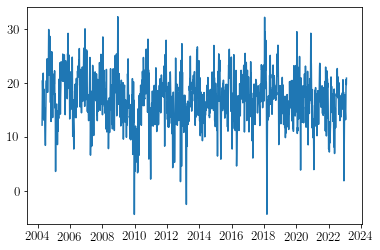

In [6]:

plt.plot(am.time_counter, am.moc_mar_hc10)

len(am.time_counter)
print(am.time_counter[13778-20:13778])
print(am.time_counter[0:20])

## amoc - get it out of the scaling factor runs

In [7]:
def make_yearlist_AMOC(yrst, yrend, tr, baseDir = '/gpfs/home/mep22dku/cdftools/MOCresults/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        tyr = yrs[i]
        ty = f'{baseDir}{tr}_1m_{tyr}0101*MOC.nc'
        t2 = glob.glob(ty)
        ylist.append(t2[0])
    return ylist

def get_max_amoc(moc_dataset):

    atl_at_26 = np.squeeze(moc_dataset.zomsfatl.sel(y=94).values)
    tshape = np.shape(atl_at_26)
    len_ts = tshape[0]

    max_atl = np.zeros(len_ts)

    for i in range(0,len(max_atl)):
        max_atl[i] = np.nanmax(atl_at_26[i,:])
        
    return max_atl

def save_max_amoc(mod):
    
    KFD0_moc = make_yearlist_AMOC(1920, 2023, f'TOM12_TJ_{mod}')
    KFD0_mocdat = xr.open_mfdataset(KFD0_moc)
    KFD0_max_amoc = get_max_amoc(KFD0_mocdat)
    nicetime  = KFD0_mocdat.indexes['time_counter'].to_datetimeindex()
    data_vars = {'amoc':(['time_counter'], KFD0_max_amoc,),}
    coords = {'time_counter': (['time_counter'], nicetime)}
    KFD0_max_amoc = xr.Dataset(data_vars=data_vars,coords=coords)
    KFD0_max_amoc.to_netcdf(f'./data/{mod}_max_amoc.nc')
    print(f'saved ./data/{mod}_max_amoc.nc')

In [8]:
ex = False

runs = ['DF30','DF45','DF48','DF50','DF55','DF52','DF70']

if ex:

    for r in runs:
        try:
            save_max_amoc(r)
        except:
            print(f'problem in amoc calc in {r}')

In [9]:
modi = {

    'DF30': {'tcol': tcol[0], 'tdesc': '3.0x', 'tlw': 1.5},
    'DF45': {'tcol': tcol[1], 'tdesc': '4.5x', 'tlw': 1.5},
    'DF48': {'tcol': tcol[2], 'tdesc': '4.8x', 'tlw': 1.5},
    'DF50': {'tcol': tcol[3], 'tdesc': '5.0x', 'tlw': 1.5},
    'DF52': {'tcol': tcol[4], 'tdesc': '5.2x', 'tlw': 1.5},
    'DF55': {'tcol': tcol[5], 'tdesc': '5.5x', 'tlw': 1.5},
    'DF70': {'tcol': tcol[6], 'tdesc': '7.0x', 'tlw': 1.5},

}
    
runs = ['DF30','DF45','DF48','DF50','DF55','DF52','DF70']

## plot timeseries, plot some stats

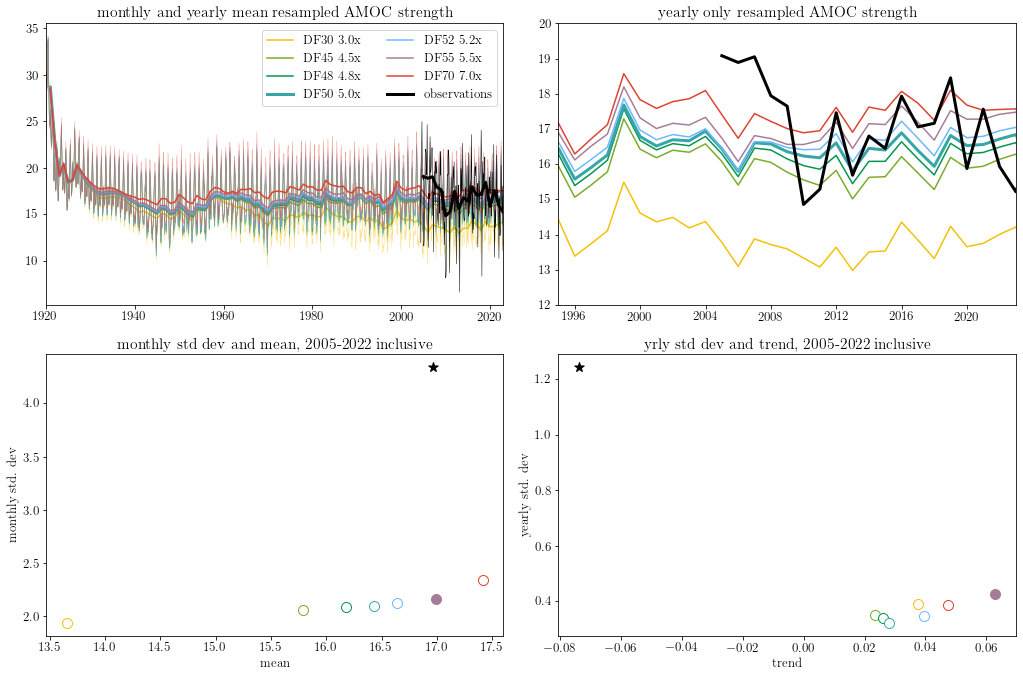

In [21]:
runs = ['DF30','DF45','DF48','DF50','DF52','DF55','DF70']
#runs = ['DF30']#,'DF45','DF48','DF50','DF55','DF52','DF70']

fact = 1.2
fig, axs = plt.subplots(2,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


for m in runs:

    trun = xr.open_dataset(f'./data/{m}_max_amoc.nc')
    
    tlw = 1.5
    if m == 'DF50':
        tlw = 3
    
    w1 = trun.groupby('time_counter.year').mean()
    
    monthly_means = trun.resample(time_counter='1MS').mean()
    axs[0].plot(monthly_means.time_counter,trun.amoc, color = modi[m]['tcol'], lw = 0.5, alpha = 0.5)
    yearly_means = trun.resample(time_counter='1Y').mean()
    desc = modi[m]['tdesc']
    axs[0].plot(yearly_means.time_counter,yearly_means.amoc, color = modi[m]['tcol'], lw = tlw, label = f'{m} {desc}')
    axs[1].plot(yearly_means.time_counter,yearly_means.amoc, color = modi[m]['tcol'], lw = tlw, label = f'{m} {desc}')

    data = trun.amoc
    subset = data.sel(time_counter=slice('2005-01-01', '2022-12-31'))
    subset = subset.assign_coords(time=subset['time_counter'].dt.year + (subset['time_counter'].dt.dayofyear - 1) / 365.25)
    mean = subset.mean().item()
    std = subset.std().item()

    lin_slope, intercept, r_value, lin_p, std_err = linregress(subset.time,subset)
    yearly_means = subset.resample(time_counter='1Y').mean()
    # Compute standard deviation of yearly means
    std_of_yearly_means = yearly_means.std().item()
    if lin_p < 0.05: color = modi[m]['tcol']
    else: color = 'w'
    axs[2].scatter(mean, std, marker = 'o', c = color, edgecolors =  modi[m]['tcol'], s = 100)
    axs[3].scatter(lin_slope, std_of_yearly_means, marker = 'o', \
                   c = color, edgecolors =  modi[m]['tcol'], s = 100)
    
    
## plot the obs
monthly_means = am.resample(time_counter='1MS').mean()
axs[0].plot(monthly_means.time_counter,monthly_means.moc_mar_hc10, color = 'k', lw = 0.5)
yearly_means = am.resample(time_counter='1Y').mean()
axs[0].plot(yearly_means.time_counter,yearly_means.moc_mar_hc10, color = 'k', lw = 3, label = f'observations')
axs[1].plot(yearly_means.time_counter,yearly_means.moc_mar_hc10, color = 'k', lw = 3, label = f'observations')

data = am.moc_mar_hc10
subset = data.sel(time_counter=slice('2005-01-01', '2022-12-31'))
subset = subset.assign_coords(time=subset['time_counter'].dt.year + (subset['time_counter'].dt.dayofyear - 1) / 365.25)
mean = subset.mean().item()
std = subset.std().item()

lin_slope, intercept, r_value, lin_p, std_err = linregress(subset.time,subset)
yearly_means = subset.resample(time_counter='1Y').mean()
# Compute standard deviation of yearly means
std_of_yearly_means = yearly_means.std().item()
if lin_p < 0.05: color = 'k'
else: color = 'w'
axs[2].scatter(mean, std, marker = '*', c = color, edgecolors =  'k', s = 100)
axs[3].scatter(lin_slope, std_of_yearly_means, marker = '*', \
               c = color, edgecolors =  'k', s = 100)



axs[0].set_xlim(pd.Timestamp('1920-01-01'), pd.Timestamp('2022-12-31'))  # Set x-axis limits
axs[1].set_xlim(pd.Timestamp('1995-01-01'), pd.Timestamp('2022-12-31'))  # Set x-axis limits
axs[0].legend(ncol = 2, loc = 'best')
axs[1].set_ylim([12,20])
axs[0].set_title('monthly and yearly mean resampled AMOC strength')
axs[1].set_title('yearly only resampled AMOC strength')
axs[2].set_title('monthly std dev and mean, 2005-2022 inclusive')
axs[3].set_title('yrly std dev and trend, 2005-2022 inclusive')
axs[2].set_xlabel('mean'); axs[2].set_ylabel('monthly std. dev'); 
axs[3].set_xlabel('trend'); axs[3].set_ylabel('yearly std. dev'); 

plt.tight_layout()

## salinity, mldr10_1, tos, mldkz5, 

In [11]:
def make_yearlist(yrst, yrend, tr, dtype = 'grid_T'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'/gpfs/home/mep22dku/scratch/ModelRuns/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        #print(t2)
        ylist.append(t2[0])
    return ylist

def save_2d(tr, yrst = 1980, yrend = 2022, tdat = 'wfo'):
    
    ySRs = xr.open_mfdataset(make_yearlist(yrst,yrend,f'TOM12_TJ_{tr}'))
    
    single_var = ySRs[tdat]
    new_ds = single_var.to_dataset()
    
    times = pd.date_range(f"{yrst}/01/01",f"{yrend+1}/01/01",freq='MS',closed='left')
    new_ds['time_counter'] = times

    try:
        new_ds.to_netcdf(f'./data/{tr}_{tdat}.nc')  
        print(f'saved ./data/{tr}_{tdat}.nc')
    except:
        print(f'some problem occured with {tr} {tdat}')
  


In [12]:
ex = False
runs = ['DF30','DF45','DF48','DF50','DF55','DF52','DF70']

if ex:
    

    for run in runs:
        save_2d(tr = run, tdat = 'sos')
        save_2d(tr = run, tdat = 'mldr10_1')

In [13]:
ex = False
runs = ['DF30','DF45','DF48','DF50','DF55','DF52','DF70']
regs = ['tmaskutil','A1','A2','ARCTIC']
dats = ['sos','mldr10_1']

tmask = xr.open_dataset('/gpfs/home/mep22dku/scratch/SOZONE/UTILS/mesh_mask3_6.nc')




def extract_mean_ts(run,tdat,reg):

    w1 = xr.open_dataset(f'./data/{run}_{tdat}.nc')
    tmask['test'] = tmask['csize']*tmask[reg][0,:,:]
    w2 = w1.weighted(tmask['test']).mean(dim = ['y','x'])
    w2.to_netcdf(f'./data/{run}_{tdat}_{reg}.nc')
    print(f'./data/{run}_{tdat}_{reg}.nc')
    return w2
    

if ex:
    
    for run in runs:
        for reg in regs:
            for tdat in dats:
                extract_mean_ts(run,tdat,reg)


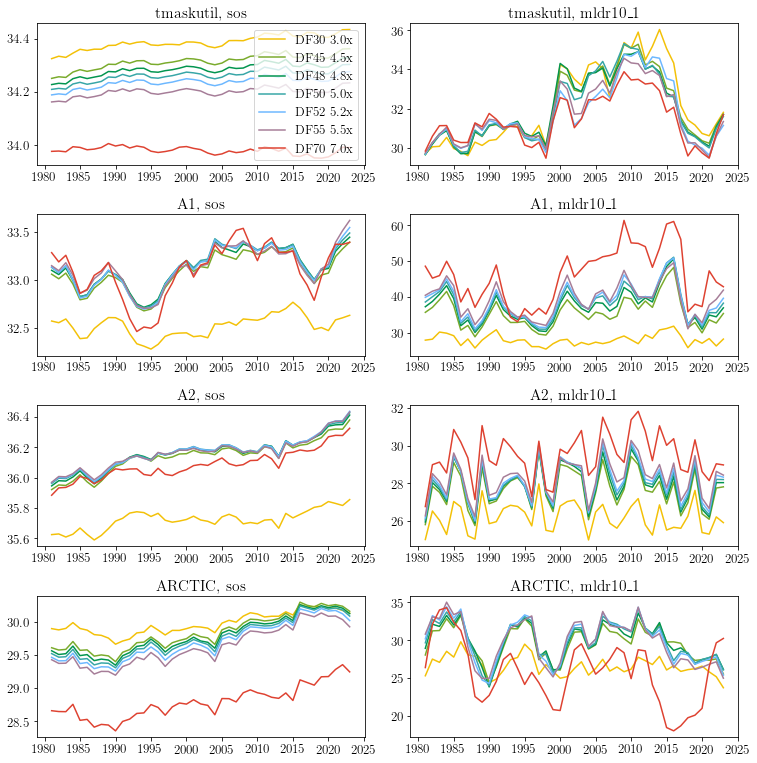

In [22]:
fact = 0.9
fig, axs = plt.subplots(4,2, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

runs = ['DF30','DF45','DF48','DF50','DF52','DF55','DF70']
#runs = ['DF30']#,'DF45','DF48','DF50','DF55','DF52','DF70']

ind = 0
for reg in regs:
    for tdat in dats:
        
        axs[ind].set_title(f'{reg}, {tdat}')
        
        for run in runs:
            desc = modi[run]['tdesc']
            w = xr.open_dataset(f'./data/{run}_{tdat}_{reg}.nc')
            yrly = w.resample(time_counter='1Y').mean()
            axs[ind].plot(yrly.time_counter, yrly[tdat], \
                          color = modi[run]['tcol'], lw = tlw, label = f'{run} {desc}')
        ind = ind+1

axs[0].legend(loc = 'best')
        
plt.tight_layout()

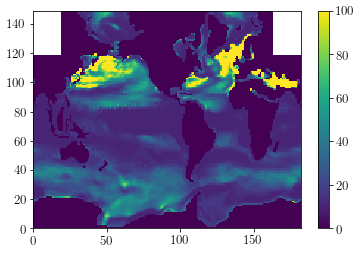

In [15]:
tdat = 'mldr10_1'
w1 = xr.open_dataset(f'./data/{run}_{tdat}.nc')

q = plt.pcolormesh(w1.mldr10_1[2,:,:], vmin = 0, vmax = 100)
plt.colorbar(q)

In [16]:
subset

<xarray.DataArray 'moc_mar_hc10' (time_counter: 13148)>
array([21.704052, 21.700842, 21.664995, ..., 17.432475, 17.284867, 17.126943])
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2005-01-01 ... 2022-12-31T12:...
    time          (time_counter) float64 2.005e+03 2.005e+03 ... 2.023e+03
Attributes:
    long_name:  overturning transport 
    units:      Sv

In [17]:
monthly_means

<xarray.Dataset>
Dimensions:       (time_counter: 227)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2004-04-01 ... 2023-02-01
Data variables:
    t_therm10     (time_counter) float64 -20.02 -19.93 -20.36 ... -21.55 -19.5
    t_aiw10       (time_counter) float64 0.5505 0.4546 0.1307 ... 0.2652 1.201
    t_ud10        (time_counter) float64 -10.84 -10.19 -9.745 ... -11.48 -10.39
    t_ld10        (time_counter) float64 -7.435 -6.869 -3.547 ... -5.566 -10.08
    t_bw10        (time_counter) float64 0.7015 0.83 1.435 ... 1.151 0.3676
    t_gs10        (time_counter) float64 31.92 31.95 30.26 ... 27.74 32.04 33.11
    t_ek10        (time_counter) float64 5.147 3.772 1.83 ... 1.745 5.164 5.313
    t_umo10       (time_counter) float64 -19.4 -19.33 -20.13 ... -20.97 -18.25
    moc_mar_hc10  (time_counter) float64 17.64 16.36 11.94 ... 11.1 16.06 20.16